In [18]:
import pandas as pd

In [19]:
#pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [20]:
df = pd.read_excel('./card_default.xls')

In [21]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [22]:
df.columns = df.iloc[0]

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30001 non-null  object
 1   LIMIT_BAL                   30001 non-null  object
 2   SEX                         30001 non-null  object
 3   EDUCATION                   30001 non-null  object
 4   MARRIAGE                    30001 non-null  object
 5   AGE                         30001 non-null  object
 6   PAY_0                       30001 non-null  object
 7   PAY_2                       30001 non-null  object
 8   PAY_3                       30001 non-null  object
 9   PAY_4                       30001 non-null  object
 10  PAY_5                       30001 non-null  object
 11  PAY_6                       30001 non-null  object
 12  BILL_AMT1                   30001 non-null  object
 13  BILL_AMT2                   30001 non-null  ob

In [25]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [26]:
df2 = df[1:]

In [28]:
len(df2)

30000

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
# construct datasets for analysis
target = 'default payment next month'
predictors = list(df.columns)
predictors.remove(target)
X = df2[predictors]
y = df2[target]

In [37]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

[1 1 0 ... 1 1 1]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed, test_size=0.3, random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [40]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

In [41]:
import numpy as np
Dtree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=5).fit(X_train, np.ravel(y_train))

In [ ]:
y_true = predictions_train.select(['label']).collect()
y_pred = predictions_train.select(['prediction']).collect()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true, y_pred))

In [43]:
model_preds = Dtree.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.818111,0.66759,0.3615,0.469024


In [44]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

In [45]:
_ = rforest.fit(X_train, y_train)

In [46]:
model_preds = rforest.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Random_forest", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.818111,0.667590,0.3615,0.469024
0,Random_forest,0.813778,0.650278,0.3505,0.455491


In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,50,40), solver='adam', max_iter=200)
_ = ann.fit(X_train, y_train)

CPU times: total: 8.31 s
Wall time: 23.3 s


In [49]:
%%time
model_preds = ann.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"MLP_Classifier", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

CPU times: total: 31.2 ms
Wall time: 42.1 ms


,model,Accuracy,Precision,Recall,F1
0,default logistic,0.818111,0.667590,0.3615,0.469024
0,Random_forest,0.813778,0.650278,0.3505,0.455491
0,MLP_Classifier,0.777556,0.000000,0.0000,0.000000


In [50]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 35.4 ms


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7000
           1       0.00      0.00      0.00      2000

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
error_rate =[]
for i in range(1,50):
    knn  = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

In [59]:
#print(classification_report(y_test,y_pred))

In [60]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Error Rate')

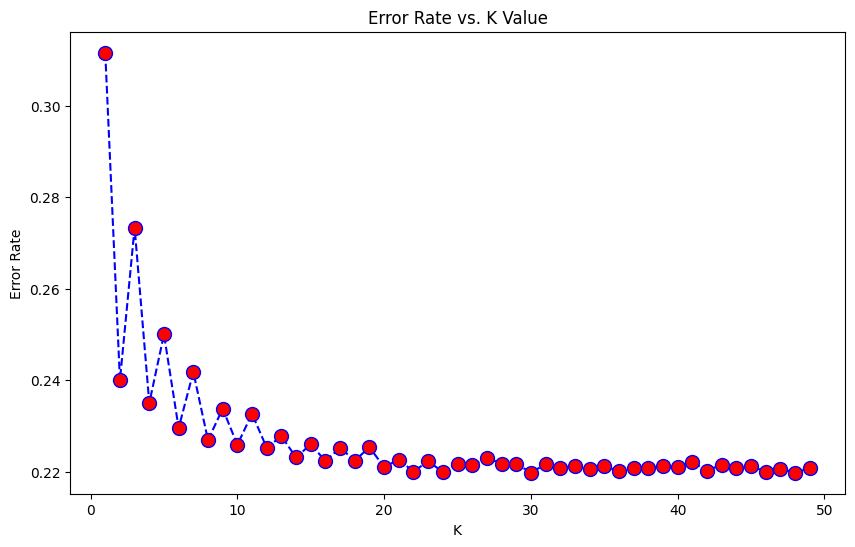

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [65]:
knn  = KNeighborsClassifier(n_neighbors=50)
_ = knn.fit(X_train,y_train)

In [66]:
model_preds = knn.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"KNN", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.818111,0.667590,0.3615,0.469024
0,Random_forest,0.813778,0.650278,0.3505,0.455491
0,MLP_Classifier,0.777556,0.000000,0.0000,0.000000
0,KNN,0.779222,0.529412,0.0585,0.105358
0,KNN,0.780111,0.556150,0.0520,0.095107
